Mean Squared Error (MSE) and R2 Scores for each Target:

life_score - MSE: 0.0012, R2: 0.7017
science_score - MSE: 0.0012, R2: 0.5641
mining_score - MSE: 0.0013, R2: 0.5827
success_score - MSE: 0.0321, R2: -0.0422


C:\Users\oyunk\AppData\Local\Temp\ipykernel_2916\3130888687.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(mse_dict.keys(), rotation=45)
C:\Users\oyunk\AppData\Local\Temp\ipykernel_2916\3130888687.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(r2_dict.keys(), rotation=45)


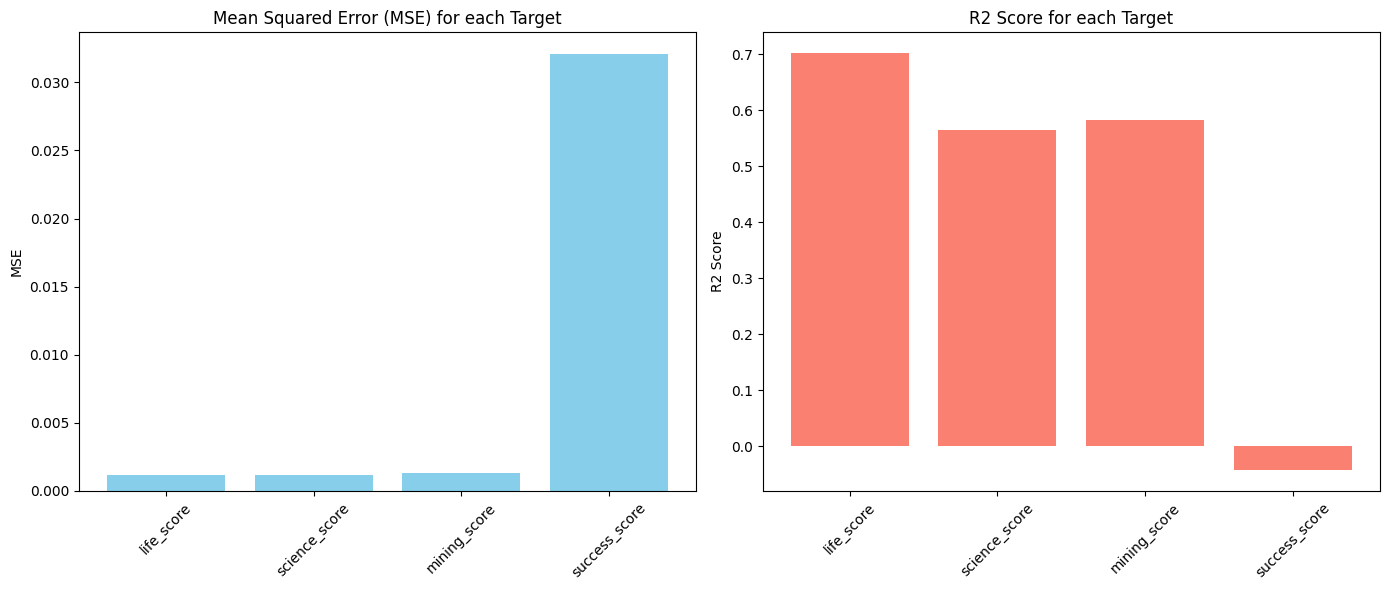

In [5]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Modelin yüklenmesi (daha önce eğitilmiş modelleri yükleyin)
models = {}
targets = ['life_score', 'science_score', 'mining_score', 'success_score']
for target in targets:
    with open(f'{target}_model.pkl', 'rb') as f:
        models[target] = pickle.load(f)

# Normalizer'ın yüklenmesi
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Veri yükleme ve hazırlama
df = pd.read_csv("element_verileri.csv")
elements = ['He', 'Ne', 'Cl', 'Mg', 'Ti', 'Fe', 'Ag', 'Ni', 'Si', 'Cu', 'Mn', 'Pt', 'U', 'Al', 'Ar', 'N', 'Zn', 'P', 'H', 'Ca', 'C', 'Cr', 'S', 'Li', 'Na', 'V']
X = df[elements]

# Özelliklerin normalizasyonu
X_scaled = scaler.transform(X)

# Hata oranlarını hesaplamak
mse_dict = {}
r2_dict = {}

for target in targets:
    y_target = df[target]
    
    # Eğitim ve test verilerini ayır
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.2, random_state=42)
    
    # Modeli kullanarak tahmin yap
    y_pred = models[target].predict(X_test)
    
    # Hata oranlarını hesapla (MSE ve R2)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_dict[target] = mse
    r2_dict[target] = r2

# Sayısal Hata Oranlarını ve R2 Skorlarını Yazdırma
print("Mean Squared Error (MSE) and R2 Scores for each Target:\n")
for target in targets:
    print(f"{target} - MSE: {mse_dict[target]:.4f}, R2: {r2_dict[target]:.4f}")

# Hata oranı ve R2 skorlarını görselleştir
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# MSE Dağılımı
ax[0].bar(mse_dict.keys(), mse_dict.values(), color='skyblue')
ax[0].set_title('Mean Squared Error (MSE) for each Target')
ax[0].set_ylabel('MSE')
ax[0].set_xticklabels(mse_dict.keys(), rotation=45)

# R2 Dağılımı
ax[1].bar(r2_dict.keys(), r2_dict.values(), color='salmon')
ax[1].set_title('R2 Score for each Target')
ax[1].set_ylabel('R2 Score')
ax[1].set_xticklabels(r2_dict.keys(), rotation=45)

plt.tight_layout()
plt.show()

# Sonuçları kaydetmek için dosya
with open('model_performance_results.txt', 'w') as f:
    f.write("Mean Squared Error (MSE) and R2 Scores for each Target:\n")
    for target in targets:
        f.write(f"{target} - MSE: {mse_dict[target]:.4f}, R2: {r2_dict[target]:.4f}\n")

